# [Chapter 6 ~ 7 ]

*KU LeeDongGyu*

## 1. Softmax Classifier
---

In [1]:
# Lab 6 Softmax Classifier
#여러개의 클래스가 있을때, 그것을 예측하는 multi classification, 그 중 자주 사용하는
#soft max에 대해 알아보자.
#로지스틱 함수를 찾는다는건, 무리를 구분하는 선을 찾는것과 같은 의미.
#이는 soft max에서도 마찬가지이다.

In [2]:
import tensorflow as tf
tf.set_random_seed(777)  # for reproducibility

In [3]:
#데이터

x_data = [[1, 2, 1, 1],
          [2, 1, 3, 2],
          [3, 1, 3, 4],
          [4, 1, 5, 5],
          [1, 7, 5, 5],
          [1, 2, 5, 6],
          [1, 6, 6, 6],
          [1, 7, 7, 7]]
y_data = [[0, 0, 1], #2
          [0, 0, 1], #2
          [0, 0, 1], #2
          [0, 1, 0], #1
          [0, 1, 0], #1
          [0, 1, 0], #1
          [1, 0, 0], #0
          [1, 0, 0]] #0
#이렇게 encoding을 해줘야한다.
#one - hot encoding : 하나만 핫하게 하는 인코딩 -> 핫하다는건 1이다라는 의미고,
#위에서 사용한 y_data가 one hot encoding임.
#마치 선형모형에서 design matrix 처럼 바뀜.

In [4]:
X = tf.placeholder("float", [None, 4])
Y = tf.placeholder("float", [None, 3])
#Y의 3도 사실 아래의 nb_classes임.
#y열의 개수는 label의 개수임. (class의 개수임.)
nb_classes = 3

In [5]:
W = tf.Variable(tf.random_normal([4, nb_classes]), name='weight')
#nb_classes = 3 이었다.
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')
#W와 b는 구분을 제대로 해주는 모수라고 쉽게 생각하자.
# ->> Y = XW + b
# ->> (n x 3 ) = (n x 4 ) (4 x 3) + (n x 3) / 차원
# ->> 1개의 데이터에 대해서, (1 x 3) = (1 x 4 ) (4 x 3 ) + (1 x 3) / 차원

In [6]:
# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
# 위는 softmax의 정의.

In [7]:
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)
#tf.sigmoid 대신 tf.nn.softmax , 얘는 확률값. softmax모형임.
#즉, 확률로 점수를 주는 행위가 softmax덕에 가능해짐.
#다시한번 잊지말기! softmax는 매번 얻어지는 모형을 통한 class의 분류 확률값들을 제공함.
# // hypothesis 는 ( 데이터의 수 x  3(class) )인 행렬이고, 각 값들은
#예측 확률로 구성되어있음. //
#W를 계산하는 과정에서, gradient descent 알고리즘이 들어가게 되고,
#이때는 Y데이터 값을 사용하기에 예측 확률은 학습을 하면할수록 갱신된다.

In [8]:
# Cross entropy cost/loss
cost = tf.reduce_mean(  -tf.reduce_sum(Y * tf.log(hypothesis), axis=1)   )
#여기서 Y의 존재의미가 담김. cost에서 Y를 쓴다. <--- 분류의 판단정보가 여기서들어감
#행렬의 *는 요소별곱임.
#reduce_sum의 옵션 axis = 1 은 행단위로 더하라는 뜻. (행렬에서)
#정확한 의미는 차원축 하나를 제거한 뒤 나머지를 더하라 라는 의미이다. 관심있으면 찾아보기.

In [9]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)
#또한 그 행위는 gradient descent의 행위를 반복함으로써 학습시키고,
#점점 더 정밀해짐.

In [10]:
# Launch graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(2001):
            _, cost_val = sess.run([optimizer, cost], feed_dict={X: x_data, Y: y_data})

            if step % 200 == 0:
                print(step, cost_val)

    print('--------------')
    # Testing & One-hot encoding
    a = sess.run(hypothesis, feed_dict={X: [[1, 11, 7, 9]]}) #행렬로 주는것을 잊지말자.
    # argument에 [hypothesis]보단 hypothesis가 출력결과를 보기 깔끔함.
    #a는 각 클래스별 확률값을 지닌 벡터가 출력이 된다.
    #hypothesis는 soft max까지 적용된 결과값이었음.
    print(a, sess.run(tf.argmax(a, 1)))
    #argmax의 1은 axis=1옵션 - 행기준비교(행중에서)
    #tf.argmax 는 어느 argument가 최대인지 index를 출력함. <- 리스트 형태로 출력됨.

    print('--------------')
    b = sess.run(hypothesis, feed_dict={X: [[1, 3, 4, 3]]})
    print(b, sess.run(tf.argmax(b, 1)))

    print('--------------')
    c = sess.run(hypothesis, feed_dict={X: [[1, 1, 0, 1]]})
    print(c, sess.run(tf.argmax(c, 1)))

    print('--------------')
    all = sess.run(hypothesis, feed_dict={X: [[1, 11, 7, 9],
                                              [1, 3, 4, 3],
                                              [1, 1, 0, 1]]}) #데이터를 행렬로 줘보자.
    print(all, "\n", sess.run(tf.argmax(all, 1))) #역시 axis=1로 해야 각 행에서 최댓값 출력.


0 6.926112
200 0.6005018
400 0.47295803
600 0.37342983
800 0.28018403
1000 0.23280531
1200 0.21065348
1400 0.19229904
1600 0.17682338
1800 0.16359547
2000 0.15216155
--------------
[[1.3890503e-03 9.9860185e-01 9.0612566e-06]] [1]
--------------
[[0.9311919  0.06290218 0.00590591]] [0]
--------------
[[1.2732840e-08 3.3411290e-04 9.9966586e-01]] [2]
--------------
[[1.3890502e-03 9.9860185e-01 9.0612657e-06]
 [9.3119192e-01 6.2902153e-02 5.9059118e-03]
 [1.2732840e-08 3.3411290e-04 9.9966586e-01]] 
 [1 0 2]


## 2. Fancy Softmax Classifier
---

### 2-1) Using Numpy

In [12]:
#고급과정 // 데이터는 이렇게 주어짐.
#softmax는 각 class를 확률로 변환시켜주는 함수임.
# Lab 6 Softmax Classifier
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)  # for reproducibility

In [13]:
# Predicting animal type based on various features
xy = np.loadtxt('/Users/82104/Desktop/data-04-zoo.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

print(x_data.shape, y_data.shape)

(101, 16) (101, 1)


In [14]:
nb_classes = 7  # 0 ~ 6

X = tf.placeholder(tf.float32, [None, 16])
Y = tf.placeholder(tf.int32, [None, 1])  # 0 ~ 6 여기서부터 벌써 차이가난다.
                                         # 일단 우리가 가진 데이터는 1줄짜리임.
#주의!!!) Y의 타입을 int로 줘서 설계행렬은 0과 1뿐임을 확실히 명시!! 

In [15]:
Y_one_hot = tf.one_hot(Y, nb_classes)  # one hot 만드는법. 꼭 숙지. tf.one_hot
print("one_hot:", Y_one_hot)
Y_one_hot = tf.reshape(Y_one_hot, shape= [-1, nb_classes]) #이 shape은 None대신 -1임!

#반드시 reshape를 해야함. (-1은 행렬에서 임의의라는 뜻)
# rank가 1개 늘어나기 때문.
# 늘어나는 이유 : 원래 데이터는 (?,1) 차원 행렬이었고, 열 차원인 1이 7개로 나눠지면서 (1,7)행렬이 된것.
# one hot shape = (?,1,7)  -> (?,7) 로 해줘야한다. design matrix 늘 생각.
#어디까지나 Y_one_hot도 그릇임.

print("reshape one_hot:", Y_one_hot)
#즉, one_hot과 reshape는 따라다닌다고 생각.

one_hot: Tensor("one_hot:0", shape=(?, 1, 7), dtype=float32)
reshape one_hot: Tensor("Reshape:0", shape=(?, 7), dtype=float32)


In [16]:
W = tf.Variable(tf.random_normal([16, nb_classes]), name='weight')
#x입력이 16개, 출력은 y가 7개이기때문에 7
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')
#출력의 개수와 똑같음.

In [17]:
# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
logits = tf.matmul(X, W) + b  #logit = Xbeta + epsilon임. (우리가 생각한모형)
hypothesis = tf.nn.softmax(logits)

In [19]:
#Cross entropy cost/loss  <--- 학습시작.
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,
                                                                 labels=tf.stop_gradient([Y_one_hot])))

# Q) // tf.nn.softmax_cross_entropy_with_logits 말고 tf.nn.softmax_cross_entropy_with_logits_v2 쓰는 이유

# -> label이 서로다른 네트워크에서 오는 경우 tf.nn.softmax_cross_entropy_with_logits 얘는 애러가 날 수 있다나?
# 대표적인 예로 GAN 의 경우가 그렇다나..? 그래서 보안책으로 tf.nn.softmax_cross_entropy_with_logits_v2가
# 나온거란다..... 
#### 나중에 배워보고 일단은 받아들이기//

In [20]:
#Q // stop_gradient 역시 이것도 왜 해야하는지 모르겠다... 지식수준을 벗어남. 일단 받아들이기.

#softmax_cross_entropy_with_logits_v2 는 logits과 labels을 옵션으로 받는데,
#logits는 XW+b에 해당하는값, labels는 Y에 해당하는 값을 주면 된다.

#labels 은 tf.stop_gradient
#cost = tf.reduce_mean(  -tf.reduce_sum(Y * tf.log(hypothesis), axis=1)   ) 얘는 Y값이 설계행렬로
#이미 주어진 경우에나 가능하다. 보통 데이터를 받아들여서 사용하는 경우는 위처럼 해야함.
#-tf.reduce_sum(Y * tf.log(hypothesis)) 이 텀을 cross entropy라 하는 듯 하다. 강의의 D함수.
#D함수를 reduce_mean한다는 것을 잊지말기! (cross_entropy를 reduce_mean 하는것 잊지말기.)

#이렇게 설계를 함수함. (logits을 반드시 기억.)

In [21]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

prediction = tf.argmax(hypothesis, 1) #확률에서 가장 높은걸 목적인 class로 할당.
#hypothesis는 계속 갱신될 것이므로, 이렇게 시행전에 선언해도 됨.

correct_prediction = tf.equal(prediction, tf.argmax(Y_one_hot, 1))
#tf.argmax(Y_one_hot, 1)를 하면 설계행렬의 각 행에서 1이 찍혀있는 열의 index를 반환해준다.
#즉, prediction과 tf.argmax(Y_one_hot,1)은 둘다 n차원 벡터이다.

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) #전부 그래프만 만드는 행위.


In [22]:
# Launch graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(2001): #데이터 학습을 2000번시킴. 즉 Gradient Descent Algorithm이 2000번 돌아감.
        _, cost_val, acc_val = sess.run([optimizer, cost, accuracy], feed_dict={X: x_data, Y: y_data})

        if step % 100 == 0:
            print("Step: {:5}\tCost: {:.3f}\tAcc: {:.2%}".format(step, cost_val, acc_val))

            #{}안에 들어오는 문법에 대해 알아놓자. 이때 :를 반드시 써줘야 함을 명심하자.
            # \t는 간격을 텝만큼 띄우라는 명령어이다.
            # 소숫점을 쓰려면 .과 f를 써줘야 하며, (f는 float의 약자)
            # %을 쓰면 비율로 값을 돌려준다.

    # Let's see if we can predict
    pred = sess.run(prediction, feed_dict={X: x_data})
    # y_data: (N,1) = flatten => (N, ) matches pred.shape
    for p, y in zip(pred, y_data.flatten()):
        #[[0],[1]] -> [0,1] 로 바꾸는게 flatten() (array를 벡터로나열)
        #주의! matrix 타입을 벡터로 나열하는건 아님!!
        # 이는 pandas로 작업을 하다보면 깨달음.
        print("[{}] Prediction: {} True Y: {}".format(p == int(y), p, int(y)))
    #같이 돌릴때는 zip함수로 묶은 후 돌릴 것.
    #재밋는 표현 사용함. 전체적으로 익숙해지기.


Step:     0	Cost: 4.144	Acc: 25.74%
Step:   100	Cost: 0.654	Acc: 79.21%
Step:   200	Cost: 0.418	Acc: 87.13%
Step:   300	Cost: 0.308	Acc: 92.08%
Step:   400	Cost: 0.245	Acc: 95.05%
Step:   500	Cost: 0.205	Acc: 95.05%
Step:   600	Cost: 0.176	Acc: 97.03%
Step:   700	Cost: 0.154	Acc: 98.02%
Step:   800	Cost: 0.137	Acc: 98.02%
Step:   900	Cost: 0.123	Acc: 98.02%
Step:  1000	Cost: 0.112	Acc: 99.01%
Step:  1100	Cost: 0.103	Acc: 99.01%
Step:  1200	Cost: 0.094	Acc: 100.00%
Step:  1300	Cost: 0.088	Acc: 100.00%
Step:  1400	Cost: 0.082	Acc: 100.00%
Step:  1500	Cost: 0.076	Acc: 100.00%
Step:  1600	Cost: 0.072	Acc: 100.00%
Step:  1700	Cost: 0.068	Acc: 100.00%
Step:  1800	Cost: 0.064	Acc: 100.00%
Step:  1900	Cost: 0.061	Acc: 100.00%
Step:  2000	Cost: 0.058	Acc: 100.00%
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 3 True Y: 3
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction:

### 2-2) Using Pandas

In [23]:
### 조금다르다
import tensorflow as tf
import numpy as np
import pandas as pd

tf.set_random_seed(777)

In [24]:
xy = pd.read_csv('/Users/82104/Desktop/data-04-zoo.csv',delimiter=',',dtype=np.float32
                 ,skiprows = range(19) ,header = None ) #skiprows는 생략할 행 설정. 엑셀열어서 확인함.

x_data = xy.iloc[:,0:-1]
y_data = xy.iloc[:,[-1]]

In [26]:
x = tf.placeholder(tf.float32, shape = [None,16])
y = tf.placeholder(tf.int32, shape = [None,1])
labels=7

y_one_hot = tf.one_hot(y,labels)
y_one_hot = tf.reshape(y_one_hot,shape=[-1,labels])

W = tf.Variable(tf.random_normal([16,labels]),dtype = tf.float32,name='weight')
b = tf.Variable(tf.random_normal([labels]),dtype=tf.float32,name='bias')

In [27]:
logits = tf.matmul(x,W) + b
f=tf.nn.softmax(logits)

In [28]:
cost= tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,
                                                 labels=tf.stop_gradient([y_one_hot])))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

In [29]:
prediction = tf.argmax(f,axis=1) # n x 1
correct_pred = tf.equal(prediction,tf.argmax(y_one_hot,axis=1))
accuracy = tf.reduce_mean(tf.cast(correct_pred,dtype=tf.float32))

In [30]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [31]:
for step in range(2001) :

    _, cost_val , acc_val = sess.run([train,cost,accuracy],
                                     feed_dict={x:x_data , y:y_data})
    if step % 200 == 0:
        print("step: {:5}\tcost: {:.3f} \taccuracy: {:.2%}".format(step,cost_val,acc_val))

pred = sess.run(prediction,feed_dict={x:x_data})
y_arr=np.array(y_data) # 이부분에서 다름에 반드시 명심하자!!
                       # 우리는 아직까지 np.matrix를 써 본적이 없고,
                       # 앞으로도 쓸 일이 없다!!
for p , y in zip(pred, y_arr.flatten()):
    print("[{}] Prediction: {} True Y: {}".format(p == int(y), p, int(y)))


step:     0	cost: 6.254 	accuracy: 12.87%
step:   200	cost: 0.326 	accuracy: 91.09%
step:   400	cost: 0.191 	accuracy: 95.05%
step:   600	cost: 0.140 	accuracy: 97.03%
step:   800	cost: 0.111 	accuracy: 98.02%
step:  1000	cost: 0.092 	accuracy: 99.01%
step:  1200	cost: 0.079 	accuracy: 100.00%
step:  1400	cost: 0.069 	accuracy: 100.00%
step:  1600	cost: 0.062 	accuracy: 100.00%
step:  1800	cost: 0.056 	accuracy: 100.00%
step:  2000	cost: 0.051 	accuracy: 100.00%
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 3 True Y: 3
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 1 True Y: 1
[True] Prediction: 3 True Y: 3
[True] Prediction: 6 True Y: 6
[True] Prediction: 6 True Y: 6
[True] Prediction: 6 True Y: 6
[True] Prediction: 1 True Y: 1
[True]

## 3. Learning rate & Evaluation
---

### 3-0) Intro

In [45]:
# Lab 7 Learning rate and Evaluation

In [32]:
# 1. learning rate
# 우리는 gradient descent를 할때 alpha(=learning rate)를 임의로 정의했음.
# 이때, 이 learning rate를 잘주는게 중요함. step이 너무크다면,
# 제대로 수렴을 못할 수 있음. (바깥으로 튕겨저 나갈 수 있음.)
# 이를 overshooting이라고 함.(cost가 크게 나타나는 경우 - 내가경험한 그것)
#
# 우리가 굉장히 작은 learning rate(step)을 주게 된다면, 최저 점이 아님에도
# 불구하고 stop하게 될 수 있음. -> cost함수를 보고 얼마나 변하는지를 보는게 중요.
#
# learning rate를 설정하는 답은 없다. 단순히 lambda값은
# 발산 -> 좀더 작게, 수렴에 의문이든다? -> 좀더 크게
# 로 한다.

In [33]:
# 더불어
# 우리는 그동안 데이터를 통해 ML(머신러닝) 모델을 학습시킴.
# 이때 이를 평가하는 법에 대해 알아보자.
#
# 데이터가 얻어지면 30%정도를 짜르고,
# 30% -> training set (얘로만 모델을 학습시킨다)
# 70% -> test set으로 둠. (얘는 절대로 사용해서는 안됨.)
#
# 후에 단 한번의 기회를 가지고 70%데이터들이 얼마나 모델에 잘맞는지 봄.
# (예측치와 참값을 비교해가면서)
# --아직은 반드시 이렇게 해야함--

In [34]:
# 혹은 좀 더 구체적으로 나누면,
# Training/ Validation/ Testing 이렇게 3개로 나눔.
# Validation은 모의시험임. 그리고 얘를 training에서 얻어진 모형에서
# 조율모수들(alpha, lambda 등) 을 설정하는 해답을 갖게됨.
# 이후에 Testing을 함.

In [46]:
# 2. data 선처리
# x1 = (1,2,3,4)
# x2 = (10000, -9000, 8000,-2000) 이렇게 매우 큰 차이가나게 된다면,
# 2차원에서만 해도 매우 찌그러진 원 형태의 등고선이 그려짐. 그리고 이는 다차원에서도 마찬가지.
#
# 이런 경우 우리가 learning rate 어떻게 주게 될지 난감하게됨
# ->> normalize  / zero-centered data 등의 행위를 해서 조절한다.
# normalize는 내가아는 statistical standardization 외에 여러개 있음.


In [63]:
#그 밖에 아래의 코드에서는 다루지 않지만,

# 3. 머신러닝의 가장 큰 문제인 overfitting
# 머신리닝이 학습을 통해 만들어질때, 학습데이터에 너무 잘맞는 모델을
# 만들어 낼 수 있음.
#
# -> 해결방법
# : 트레이닝 데이터가 많으면 많을수록.
# : 우리가 가지고 있는 features 수를 지우기
# : Regularization(일반화) 시키기
#
# 좀더 자세히, Regularization 를 하라는 뜻은,
# -너무 많은 weight를 주지 말자.- 라는 뜻.
# 우리가 오버피팅 한다는 의미는 weight을 주고 직선을 더욱더 곡선으로 만드는
# 행위를 이야기함.
#
# 이런 regularization의 예로, Lasso, Ridge 등이 있음. (cost함수 뒤에 lambda * sum w^2을 더함)
# 이때 lambda를 regularization strength라고 함. 클수록 regularization을
# 중요하게 생각한다는 뜻. (조율모수)

### 3-1) Learning Rate

In [35]:
import tensorflow as tf
tf.set_random_seed(777)  # for reproducibility
####이게 train // 앞으로는 반드시 데이터셋을 나눈다.

In [36]:
x_data = [[1, 2, 1],
          [1, 3, 2],
          [1, 3, 4],
          [1, 5, 5],
          [1, 7, 5],
          [1, 2, 5],
          [1, 6, 6],
          [1, 7, 7]]
y_data = [[0, 0, 1], #one hot
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]


# Evaluation our model using this test dataset
x_test = [[2, 1, 1],
          [3, 1, 2],
          [3, 3, 4]]
y_test = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1]]

In [37]:
X = tf.placeholder("float", [None, 3])
Y = tf.placeholder("float", [None, 3])

W = tf.Variable(tf.random_normal([3, 3]))
b = tf.Variable(tf.random_normal([3]))

In [38]:
# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

In [41]:
# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
# Try to change learning_rate to small numbers
optimizer = tf.train.GradientDescentOptimizer(learning_rate=10).minimize(cost)
#learning_rate 를 1e-10로 줘도, 결과가 매우 이상하게 나옴. <- learning_rate조절 잘하자!!

#이 경우 올바른 learning_rate는 0.1 정도.

In [42]:
# Correct prediction Test model
prediction = tf.argmax(hypothesis, 1)
is_correct = tf.equal(prediction, tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
#################여기까지 전부 똑같다###############

In [43]:
# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(201):
        cost_val, W_val, _ = sess.run([cost, W, optimizer], feed_dict={X: x_data, Y: y_data})
        #학습은 x_data - train으로,
        print(step, cost_val, W_val)

    # predict
    print("Prediction:", sess.run(prediction, feed_dict={X: x_test})) #예측은 test / 예측은 feed_dict input이 1개
    # Calculate the accuracy
    print("Accuracy: ", sess.run(accuracy, feed_dict={X: x_test, Y: y_test})) #정확도도 test / 정확도는 feed_dict input이 2개

    #accuracy , prediction 는 학습이 되고 고정이 됨. (모형적용)
    
    
#아래의 결과를 보면, learning_rate 문제 때문에 값이 이상하게 출력되었다.

0 8.122051 [[  1.9570366  -6.307736    1.289583 ]
 [ 17.140127  -25.287569    9.284473 ]
 [ 15.430665  -23.158712    9.579567 ]]
1 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
2 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
3 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
4 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
5 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
6 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
7 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
8 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
9 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
10 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
11 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
12 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
13 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
14 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
15 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
16 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
17 nan [[nan nan nan]
 [nan nan 

### 3-2) Non Normalized 

In [47]:
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)  # for reproducibility

In [48]:
#데이터
#3번째 열들은 굉장히 큰 값을 지닌 행렬이다.
xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

In [49]:
x_data = xy[:, 0:-1] #마지막 열 빼고 나머지
y_data = xy[:, [-1]] #마지막 열

In [50]:
# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([4, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

In [51]:
# Hypothesis
hypothesis = tf.matmul(X, W) + b

In [52]:
# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

In [53]:
# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

In [54]:
for step in range(101):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    print(step, "Cos: ", cost_val, "\nPrediction:\n", hy_val)

#결과가 아주 엉망이다.

0 Cos:  3668089800000.0 
Prediction:
 [[1351451.8]
 [2720935.5]
 [2140395.2]
 [1500313.2]
 [1768253.6]
 [1783139.4]
 [1634285.5]
 [2080856.5]]
1 Cos:  4.0300587e+27 
Prediction:
 [[-4.4780298e+13]
 [-9.0147337e+13]
 [-7.0915656e+13]
 [-4.9711499e+13]
 [-5.8587657e+13]
 [-5.9080777e+13]
 [-5.4149580e+13]
 [-6.8943176e+13]]
2 Cos:  inf 
Prediction:
 [[1.4843034e+21]
 [2.9880550e+21]
 [2.3505951e+21]
 [1.6477547e+21]
 [1.9419669e+21]
 [1.9583120e+21]
 [1.7948608e+21]
 [2.2852147e+21]]
3 Cos:  inf 
Prediction:
 [[-4.9199248e+28]
 [-9.9043127e+28]
 [-7.7913659e+28]
 [-5.4617058e+28]
 [-6.4369123e+28]
 [-6.4910906e+28]
 [-5.9493091e+28]
 [-7.5746532e+28]]
4 Cos:  inf 
Prediction:
 [[1.6307755e+36]
 [3.2829181e+36]
 [2.5825534e+36]
 [1.8103562e+36]
 [2.1336016e+36]
 [2.1515596e+36]
 [1.9719787e+36]
 [2.5107210e+36]]
5 Cos:  inf 
Prediction:
 [[-inf]
 [-inf]
 [-inf]
 [-inf]
 [-inf]
 [-inf]
 [-inf]
 [-inf]]
6 Cos:  nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
7 Cos

### 3-3) Normalized

In [55]:
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)  # for reproducibility

In [56]:
#이런 함수를 정의함.
#이걸 사용하게 되면, 가장 큰걸 1, 가장작은걸 0으로 기준하고
#나머지는 비율에 맞춰 표준화를 시키게 됨. 유니폼하게 선형으로 연산됨.

# 혹은 다양한 방식으로 데이터를 표준화 시킬 수 있음.
# https://medium.com/@swethalakshmanan14/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff
# 위의 사이트를 참고할 것.

def min_max_scaler(data):
    numerator = data - np.min(data, 0) #각 열기준 최솟값을 데이터 원소에서 빼는것.
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7) # 최소한의 분모를 1e-7로 고정.

In [57]:
#행렬을 이쁘게 표현하는 법. 숙지하기.
xy = np.array(
    [
        [828.659973, 833.450012, 908100, 828.349976, 831.659973],
        [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
        [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
        [816, 820.958984, 1008100, 815.48999, 819.23999],
        [819.359985, 823, 1188100, 818.469971, 818.97998],
        [819, 823, 1198100, 816, 820.450012],
        [811.700012, 815.25, 1098100, 809.780029, 813.669983],
        [809.51001, 816.659973, 1398100, 804.539978, 809.559998],
    ]
)

In [58]:
# very important. It does not work without it.
xy = min_max_scaler(xy) #이러면 원소별로 적용이된다.

print(xy)

[[0.99999999 0.99999999 0.         1.         1.        ]
 [0.70548491 0.70439552 1.         0.71881782 0.83755791]
 [0.54412549 0.50274824 0.57608696 0.606468   0.6606331 ]
 [0.33890353 0.31368023 0.10869565 0.45989134 0.43800918]
 [0.51436    0.42582389 0.30434783 0.58504805 0.42624401]
 [0.49556179 0.42582389 0.31521739 0.48131134 0.49276137]
 [0.11436064 0.         0.20652174 0.22007776 0.18597238]
 [0.         0.07747099 0.5326087  0.         0.        ]]


In [59]:
############이후는 동일하다.############

In [60]:
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([4, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

In [61]:
# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

In [62]:
# Launch the graph in a session.
with tf.Session() as sess:
    # Initializes global variables in the graph.
    sess.run(tf.global_variables_initializer())

    for step in range(101):
        _, cost_val, hy_val = sess.run(
            [train, cost, hypothesis], feed_dict={X: x_data, Y: y_data}
        )
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)

##학습이 잘 이루어진다.

0 Cost:  4.622258 
Prediction:
 [[4.1102576 ]
 [4.209818  ]
 [3.0021589 ]
 [1.6282101 ]
 [2.4901907 ]
 [2.4137754 ]
 [0.75304025]
 [0.87244743]]
1 Cost:  4.621919 
Prediction:
 [[4.1101494]
 [4.209713 ]
 [3.002072 ]
 [1.6281435]
 [2.4901114]
 [2.413699 ]
 [0.7529902]
 [0.8723982]]
2 Cost:  4.621581 
Prediction:
 [[4.110041 ]
 [4.209608 ]
 [3.0019853]
 [1.6280771]
 [2.4900322]
 [2.4136226]
 [0.7529402]
 [0.8723491]]
3 Cost:  4.621243 
Prediction:
 [[4.109933  ]
 [4.2095037 ]
 [3.0018988 ]
 [1.6280107 ]
 [2.4899533 ]
 [2.4135463 ]
 [0.7528901 ]
 [0.87229985]]
4 Cost:  4.6209044 
Prediction:
 [[4.1098247]
 [4.2093987]
 [3.0018122]
 [1.6279445]
 [2.4898741]
 [2.4134698]
 [0.7528401]
 [0.8722507]]
5 Cost:  4.6205664 
Prediction:
 [[4.1097164 ]
 [4.209294  ]
 [3.0017254 ]
 [1.6278782 ]
 [2.4897947 ]
 [2.4133935 ]
 [0.75279003]
 [0.8722015 ]]
6 Cost:  4.6202283 
Prediction:
 [[4.1096087 ]
 [4.2091894 ]
 [3.001639  ]
 [1.6278117 ]
 [2.4897156 ]
 [2.4133167 ]
 [0.75274   ]
 [0.87215227]]
7 Cost

97 Cost:  4.589575 
Prediction:
 [[4.0997868 ]
 [4.199687  ]
 [2.9937685 ]
 [1.6217836 ]
 [2.4825206 ]
 [2.406375  ]
 [0.74819386]
 [0.8676861 ]]
98 Cost:  4.589238 
Prediction:
 [[4.0996785]
 [4.1995826]
 [2.9936824]
 [1.6217173]
 [2.4824417]
 [2.4062989]
 [0.748144 ]
 [0.8676371]]
99 Cost:  4.5889025 
Prediction:
 [[4.0995708 ]
 [4.199478  ]
 [2.993596  ]
 [1.6216512 ]
 [2.4823625 ]
 [2.4062226 ]
 [0.7480941 ]
 [0.86758816]]
100 Cost:  4.588567 
Prediction:
 [[4.099463  ]
 [4.1993737 ]
 [2.9935098 ]
 [1.621585  ]
 [2.482284  ]
 [2.4061463 ]
 [0.74804425]
 [0.86753917]]


## 4. MNIST Data
---

In [1]:
# Lab 7 Learning rate and Evaluation
import tensorflow as tf
import matplotlib.pyplot as plt
import random

In [2]:
# MNIST 데이터 - 우체국에서 우편번호 숫자 쓸때 그 인식과 관련된 데이터

# Online learning이라는 학습이 있음.
# 100만개의 training set이 있다고 한다면, 한번에 시행하는 것이 아닌
# 10만개씩 잘라서 학습을 시킨다.
# 이때, 모형만은 남아서 추가로 계속 학습이 되어야함.
#
# 굉장히 좋은 아이디어이며,  추가로 들어올 데이터에 대한 학습의 여지도 남겨놓기 때문.
# MINIST 데이터는 굉장히 유명한 숫자 손글씨 데이터.
# 이런 데이터도 데이터가 나눠져있음.
# ----------------------------------------------------------------
# 이후 정확도에 대한 관심사도 빼놓을 수 없음.(최종목표)
# Y값과 모델이 예측한 값의 비교를 하고, 얼마나 맞추는지를 이야기함.
# 최근 이미지 정확도는 적어도 95%를 넘기고 있다. 상당히 정확한 편.

In [3]:
tf.set_random_seed(777)  # for reproducibility
from tensorflow.examples.tutorials.mnist import input_data #그 많은 데이터들 중 mnist input_data만 불러옴.

In [4]:
############################## 참고 사이트 ##############################
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset
# mnist 데이터셋 정리1 : https://pythonkim.tistory.com/46
# 데이터 파일이 궁금하다면? : https://m.blog.naver.com/PostView.nhn?blogId=acwboy&logNo=220584307823&proxyReferer=https%3A%2F%2Fwww.google.com%2F

In [5]:
#input_data만 함수로 받아왔기에, 아래오 같이 씀. 만약 import로 tensorflow.examples.tutorials.mnist 를 했으면,
#tensorflow.examples.tutorials.mnist.input_Data.read_data_sets로 매우 길어짐... 읽기불편 // 이게 from ~ import를 쓰는 이유.

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

#데이터가 Mnist가 없으면 자동으로 설치하고, mnist에 자동으로 변수저장이 된다.
# "MNIST_data/" 의 경로는 바탕화면이다.(?) <- 내가 경로를 바탕화면에 저장해서 그렇게 생긴걸듯..
# 다시말해, MNIST_data폴더가 생성되고, mnist변수에 mnist 데이터를 one_hot으로 불러오라는 명령어.

#y값을 one_hot으로 처리해서 불러오는 옵션. 반드시 True로 돌릴것.
#물론 데이터가 one-hot 방식으로 넘어오면 쉽게 처리할 수 있다.
#mnist를 출력해보면, 데이터셋이 train, validation, test로 구성되어있는거 확인가능.

W0817 17:42:37.336298  5308 deprecation.py:323] From <ipython-input-5-440196bda884>:4: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0817 17:42:37.349810  5308 deprecation.py:323] From C:\Users\82104\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0817 17:42:37.351812  5308 deprecation.py:323] From C:\Users\82104\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
I

Extracting MNIST_data/train-images-idx3-ubyte.gz


W0817 17:42:37.646927  5308 deprecation.py:323] From C:\Users\82104\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0817 17:42:37.649927  5308 deprecation.py:323] From C:\Users\82104\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0817 17:42:37.717946  5308 deprecation.py:323] From C:\Users\82104\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is

Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [6]:
nb_classes = 10

# MNIST data image of shape 28 * 28 = 784
# 28*28 = 784 픽셀로 이루어짐. 즉, 784개의 x변수들이 있음.
X = tf.placeholder(tf.float32, [None, 784])

# 0 - 9 digits recognition = 10 classes
# Y는 0~9로 출력이 됨. 즉, 10개의 변수들.
Y = tf.placeholder(tf.float32, [None, nb_classes])

In [7]:
W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes])) #y의 사이즈

In [8]:
# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

In [9]:
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [10]:
# Test model
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
#tf 1.14.0 에서 부터 argmax 를 사용하도록 권장. (arg_max보다)

# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
#tf.cast에 tf.float32이 타입옵션으로 들어감을 잊지말기.

In [11]:
# parameters
num_epochs = 15 #15번 학습함. (많을수록 좋지만..)
#전체 데이터셋을 한번 다 실행(학습)시키는 것을 epoch라고 함.

batch_size = 100 # 1 epoch 을 위해 100개씩 나눠 읽음.
#batch size와 관련된 사이트 : https://blog.naver.com/qbxlvnf11/221449595336

num_iterations = int(mnist.train.num_examples / batch_size) 
#loop는 정수형을 받기 때문.
# num_iterations 는 1 epoch에 필요한 데이터 수를 batch_size로 나누어서
# 몇번을 돌면 1 epoch인지 나타내는 변수.
# 주의!! tf.train과 mnist.train은 다른 train임!!

In [12]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [13]:
for epoch in range(num_epochs): 
    #루프가 두번돌아간다. for문은 늘 range로 받음을 잊지말기!
    
    avg_cost = 0

    for i in range(num_iterations):
        
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        # next_batch함수는 mnist데이터에만 있음. 즉 input_data class에만 있는듯.
        # 1부터 100개 주고, 101번째부터 200까지 주고.. 이런행위임.
        
        _, cost_val = sess.run([train, cost], feed_dict={X: batch_xs, Y: batch_ys})
        
        avg_cost += cost_val / num_iterations
         #분모는 550으로 고정임.
         # 100개씩 학습을 시키면서 cost 550종류 다더하고 550 나누는것과 같음.
         # 전체를 한번에 학습하는 cost에서 시행하는 55000으로 나눈것과 다르다.
         # 즉, batch_size를 어떻게 정하느냐에 따라 cost는 달라질 수 있다.


    #1 epoch이 끝남.


    print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost))

print("Learning finished") #멋잇당

Epoch: 0001, Cost: 2.826302752
Epoch: 0002, Cost: 1.061668976
Epoch: 0003, Cost: 0.838061328
Epoch: 0004, Cost: 0.733232746
Epoch: 0005, Cost: 0.669279894
Epoch: 0006, Cost: 0.624611839
Epoch: 0007, Cost: 0.591160358
Epoch: 0008, Cost: 0.563868996
Epoch: 0009, Cost: 0.541745189
Epoch: 0010, Cost: 0.522673595
Epoch: 0011, Cost: 0.506782334
Epoch: 0012, Cost: 0.492447652
Epoch: 0013, Cost: 0.479955845
Epoch: 0014, Cost: 0.468893677
Epoch: 0015, Cost: 0.458703488
Learning finished


In [14]:
# Test the model using test sets
print(
    "Accuracy: ",
    accuracy.eval(
        #sess.run으로 돌려도 되고, accuracy 같은 tense에 eval이라는 매서드 호출.
        
        session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}
        
    ),
)
#간단한 모델임에도 89%로 맞춘다.

Accuracy:  0.8951


In [15]:
# Get one and predict

#기본적으로 랜덤하게 하나 읽어옴.

r = random.randint(0, mnist.test.num_examples - 1)
#num_examples는 1만개이다.
#random.randint(최소,최대) = 최소부터 최대까지 중 임의의 정수를 반환함.

print("Label: ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], 1)))
#array를 행렬인 상태로 유지하면서 r번째를 불러오려면 r:r+1 이렇게 적어줘야 한다.
#mnist.test.labels[r]도 되지만, 이는 r번째 행을 벡터로 반환해서 불러옴!!

#테스트 할 label에 1개 읽어옴.
print(
    "Prediction: ",
    sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r : r + 1]}),
)


Label:  [6]
Prediction:  [6]


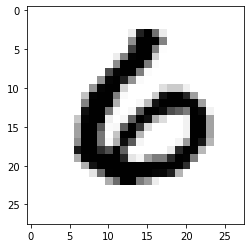

In [18]:
plt.imshow( #image show
    mnist.test.images[r : r + 1].reshape(28, 28), #배열 재정의.
    cmap="Greys",
    interpolation="nearest",
    #cmap은 칼라맵, interpolation은 색의 보간처리를 어떻게 할것인지에 대한 내용
    #다음의 사이트를 참고하면 이해할 수 있다.
    #cmap : https://pythonkim.tistory.com/82 cmap의 옵션선택을 할 수 있음.
    #interpolation: https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/interpolation_methods.html
)
plt.show() #잘됐다

## 4. Sources
---

- [Main site](https://hunkim.github.io/ml/)
- [Github](https://hunkim.github.io/ml/)